In [ ]:
import numpy as np
from numpy import *
from scipy import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML

<img src="http://i.imgur.com/MUZI0uK.png" alt="" >

The speech signal from a loud speaker is acoustically coupled into the microphone of a speaker phone or hands-free cell phone which is heard at the remote signal source as a return echo. The echo is suppressed by an echo canceller at the echo source by the system modeled in the figure above. Basic acoustic echo cancellation is based on the Least Mean Squares (LMS) algorithm

In [37]:
b = np.array([1, 0, 0, 0.5, 0, .1]) #acoustic channel 
Wc, Hc = signal.freqz(b) 
fs = 2*np.pi;
tmax = 10000;

#setup an fm sweep training signal used below
f1=0;
f2 = .5;
tsweep = arange(500.)
slope = (f2-f1)/1000;
F = slope*((tsweep % 500));

F = slope*((tsweep % 500));
fm2 = cos(2*pi*(F)*tsweep);

fm2c = kron(ones((1,20)),fm2)
fm2 = fm2c.flatten()

#plt.plot(arange(0,1001), fm2[0:1001])
#plt.grid(True)

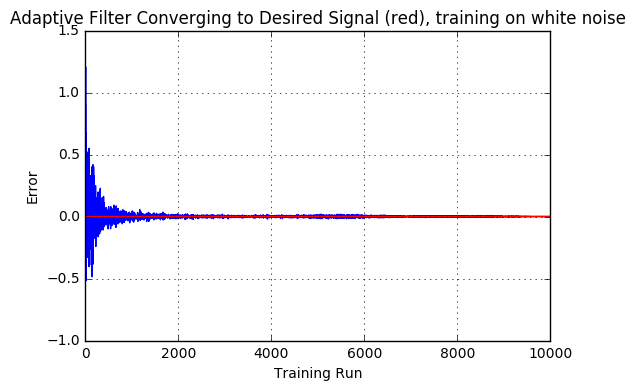

In [30]:
trainlen = tmax


# training signal
r_t = 1*random.random((tmax,));

# desired signal
s_t = 0;

# signal through channel
rt_ht = signal.lfilter(b,1,r_t)

# signal through channel + desired
mic_in = s_t + rt_ht

# register and weights
reg1 = (np.zeros(50))
wts_sv = wts = np.asmatrix(np.zeros(50))

# mu for LMS
mu  = .07

y = zeros(trainlen)

#LMS Algorithm 
for n in range(0,trainlen):
 
  wts_sv = wts;
  
  reg1 = np.hstack((r_t[n], reg1[0:49,]))
    
  err = mic_in[n] - ( np.asmatrix(reg1)*wts.transpose() )
  
  y[n] = err
  
  wts = wts + mu*( (reg1)*(np.asarray(err.transpose())))
  
#plot time results
plt.plot(arange(0,len(y)),(y))
plt.plot(arange(0,len(y)), np.zeros(len(y)), color='r')
plt.ylabel('Error')
plt.xlabel('Training Run')
plt.title('Adaptive Filter Converging to Desired Signal (red), training on white noise')
plt.grid(True)

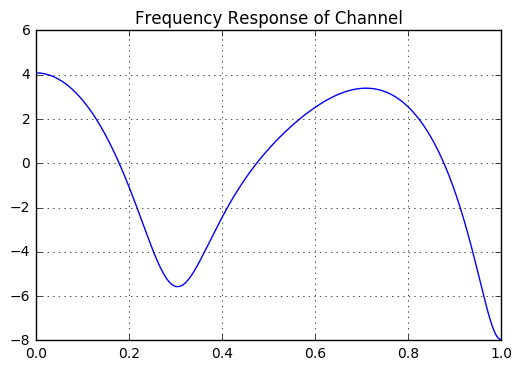

In [41]:
plt.plot(Wc/np.pi, 20*np.log10(abs(Hc)))
plt.title('Frequency Response of Channel')
plt.grid(True)

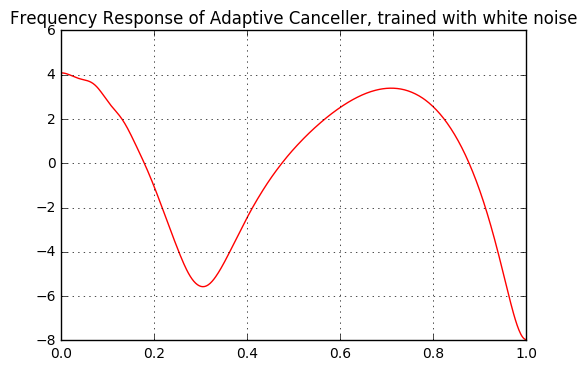

In [44]:
Wf,Hf = signal.freqz(np.asarray(wts_sv).ravel());
plt.plot(Wf/np.pi, 20*np.log10(abs(Hf)),color='r')
plt.title('Frequency Response of Adaptive Canceller, trained with white noise')
plt.grid(True)

Training With FM sweep instead of noise

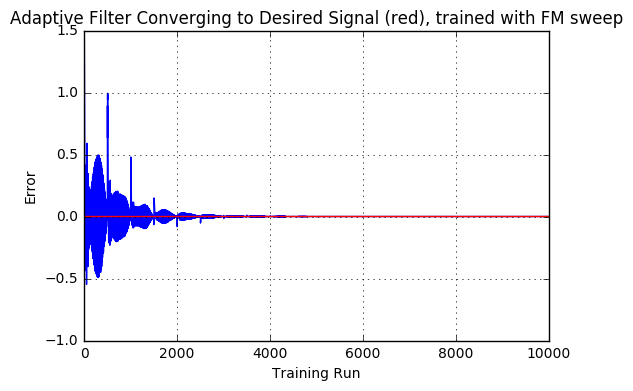

In [45]:
#%training signal
r_t = fm2;

#%desired signal
s_t = 0;

#%signal through channel
rt_ht = signal.lfilter(b,1,r_t)

#%signal through channel + desired
mic_in = s_t + rt_ht

reg1 = (np.zeros(50))
wts_sv = wts = np.asmatrix(np.zeros(50))

mu  = .01

y = zeros(trainlen)

#LMS Algorithm
for n in range(0,trainlen):
 
  wts_sv = wts;
  
  reg1 = np.hstack((r_t[n], reg1[0:49,]))
    
  err = mic_in[n] - ( np.asmatrix(reg1)*wts.transpose() )
  
  y[n] = err
  
  wts = wts + mu*( (reg1)*(np.asarray(err.transpose())))
  

plt.plot(arange(0,len(y)),(y))
plt.plot(arange(0,len(y)), np.zeros(len(y)), color='r')
plt.ylabel('Error')
plt.xlabel('Training Run')
plt.title('Adaptive Filter Converging to Desired Signal (red), trained with FM sweep')
plt.grid(True)